In [10]:
import sqlite3
import pandas as pd

# Main database 
db_path = './data/USAdatabase.db'

def list_tables(conn):
   
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    tables_df = pd.read_sql_query(query, conn)
    
    
    tables_df.rename(columns={'name': 'Table name list'}, inplace=True)
    return tables_df

def load_table(conn, table_name):
  
    query = f"SELECT * FROM {table_name};"
    return pd.read_sql_query(query, conn)

try:
    conn = sqlite3.connect(db_path)
    
   
    tables_df = list_tables(conn)
    print("Available tables in the database:")
    display(tables_df)
    
   
    if "population_usa_2020_2023" in tables_df['Table name list'].values:
        population_df = load_table(conn, "population_usa_2020_2023")
        print("\nPopulation table data:")
        display(population_df.head())
    else:
        print("\nTable 'population_usa_2020_2023' not found.")
    
    if "unemployment_rates_usa_2020_2023" in tables_df['Table name list'].values:
        unemployment_df = load_table(conn, "unemployment_rates_usa_2020_2023")
        print("\nUnemployment rate table data:")
        display(unemployment_df.head())
    else:
        print("\nTable 'unemployment_rates_usa_2020_2023' not found.")
    
    
    conn.close()

except Exception as e:
    print(f"Error: {e}")


Available tables in the database:


,Table name list
0,population_usa_2020_2023
1,unemployment_rates_usa_2020_2023



Population table data:


,state,2020,2021,2022,2023
0,United States,331526933,332048977,333271411,334914895
1,Northeast Region,57430477,57243423,57026847,56983517
2,New England,15057898,15106108,15120739,15159777
3,Middle Atlantic,42372579,42137315,41906108,41823740
4,Midwest Region,68969794,68850246,68783028,68909283



Unemployment rate table data:


,state,rate_2023,rate_2022,rate_2021,rate_2020
0,United States,3.6,3.6,5.3,8.1
1,Alabama,2.5,2.5,3.4,6.4
2,Alaska,4.2,4.2,6.4,8.3
3,Arizona,3.9,3.8,5.1,7.8
4,Arkansas,3.3,3.2,4.0,6.2


,state,2020,2021,2022,2023,rate_2023,rate_2022,rate_2021,rate_2020
0,United States,331526933,332048977,333271411,334914895,3.6,3.6,5.3,8.1
1,Alabama,5031864,5050380,5073903,5108468,2.5,2.5,3.4,6.4
2,Alaska,732964,734923,733276,733406,4.2,4.2,6.4,8.3
3,Arizona,7186683,7272487,7365684,7431344,3.9,3.8,5.1,7.8
4,Arkansas,3014348,3028443,3046404,3067732,3.3,3.2,4.0,6.2


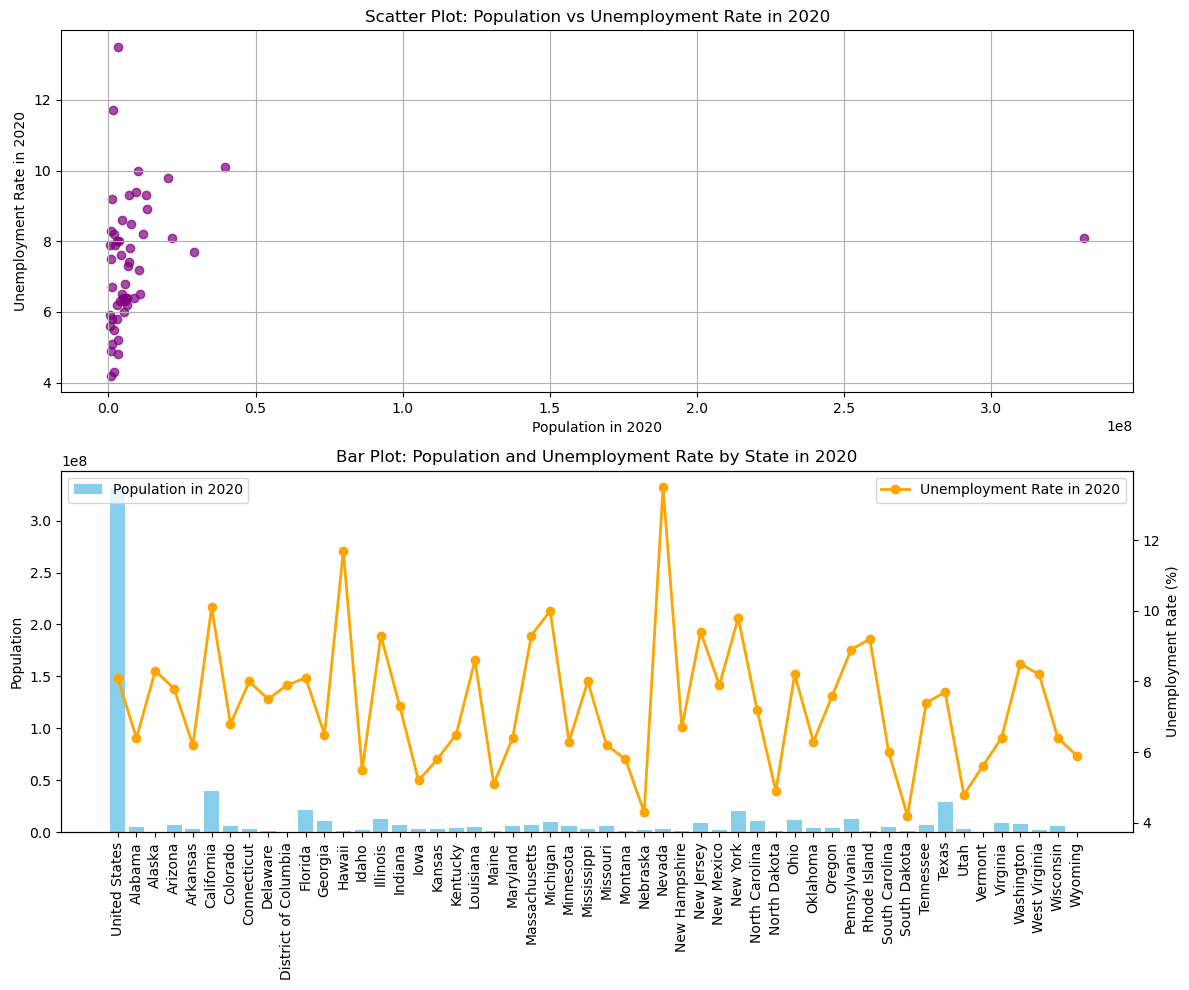

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Main database 
db_path = './data/USAdatabase.db'


def load_table(conn, table_name):
    query = f"SELECT * FROM {table_name};"
    return pd.read_sql_query(query, conn)


try:
    conn = sqlite3.connect(db_path)
    
  
    population_df = load_table(conn, "population_usa_2020_2023")
    unemployment_df = load_table(conn, "unemployment_rates_usa_2020_2023")
    
  
    conn.close()
except Exception as e:
    print(f"Error loading data: {e}")

# Merge table based on the "state" column
merged_df = pd.merge(population_df, unemployment_df, on='state')

# Display the merged DataFrame
display(merged_df.head())

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# 1. Scatter Plot: Population vs Unemployment Rate in 2020
ax1.scatter(merged_df['2020'], merged_df['rate_2020'], color='purple', alpha=0.7)
ax1.set_xlabel('Population in 2020')
ax1.set_ylabel('Unemployment Rate in 2020')
ax1.set_title('Scatter Plot: Population vs Unemployment Rate in 2020')
ax1.grid(True)

# 2. Bar Plot: Population and Unemployment Rate for each State in 2020
states = merged_df['state']
population = merged_df['2020']
unemployment_rate = merged_df['rate_2020']

# Bar plot
ax2.bar(states, population, color='skyblue', label='Population in 2020')
ax2.set_ylabel('Population')
ax2.set_title('Bar Plot: Population and Unemployment Rate by State in 2020')

# Second axis for unemployment rate
ax2_2 = ax2.twinx()
ax2_2.plot(states, unemployment_rate, color='orange', marker='o', label='Unemployment Rate in 2020', linewidth=2)
ax2_2.set_ylabel('Unemployment Rate (%)')
ax2_2.grid(False)

# add icks and tick labels
ax2.set_xticks(range(len(states)))
ax2.set_xticklabels(states, rotation=90)


ax2.legend(loc='upper left')
ax2_2.legend(loc='upper right')


plt.tight_layout()
plt.show()


,state,2020,2021,2022,2023,rate_2023,rate_2022,rate_2021,rate_2020
0,United States,331526933,332048977,333271411,334914895,3.6,3.6,5.3,8.1
1,Alabama,5031864,5050380,5073903,5108468,2.5,2.5,3.4,6.4
2,Alaska,732964,734923,733276,733406,4.2,4.2,6.4,8.3
3,Arizona,7186683,7272487,7365684,7431344,3.9,3.8,5.1,7.8
4,Arkansas,3014348,3028443,3046404,3067732,3.3,3.2,4.0,6.2


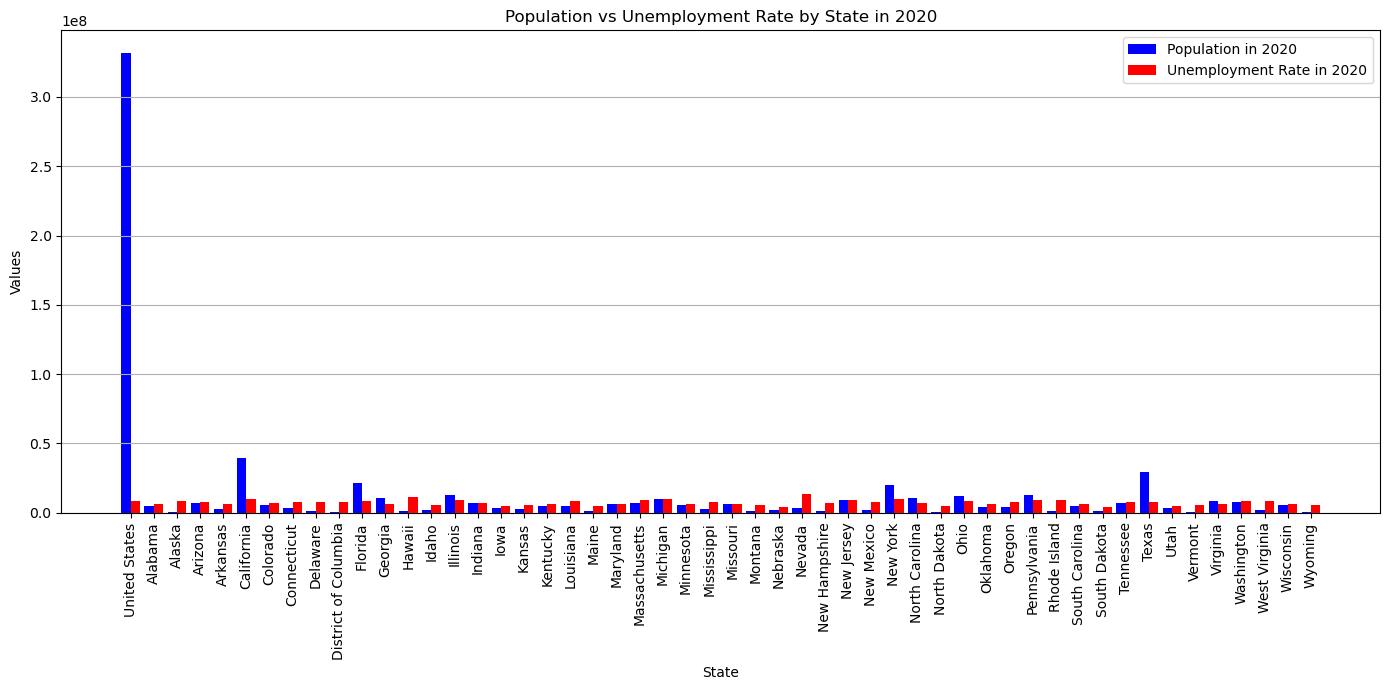

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# main database
db_path = './data/USAdatabase.db'


def load_table(conn, table_name):
    query = f"SELECT * FROM {table_name};"
    return pd.read_sql_query(query, conn)


try:
    conn = sqlite3.connect(db_path)
    
   
    population_df = load_table(conn, "population_usa_2020_2023")
    unemployment_df = load_table(conn, "unemployment_rates_usa_2020_2023")
    
   
    conn.close()
except Exception as e:
    print(f"Error loading data: {e}")

# Merge two table based on the "state" column
merged_df = pd.merge(population_df, unemployment_df, on='state')


display(merged_df.head())

# Create a dual bar chart
states = merged_df['state']
population = merged_df['2020']
unemployment_rate = merged_df['rate_2020']

# Set the positions and width for the bars
x = np.arange(len(states))
width = 0.4

# Create a figure
plt.figure(figsize=(14, 7))

# Bar chart for population in 2020
plt.bar(x - width/2, population, width, label='Population in 2020', color='blue')

# Bar chart for unemployment rate in 2020
plt.bar(x + width/2, unemployment_rate * 1_000_000, width, label='Unemployment Rate in 2020', color='red')

# Add labels, title, and legend
plt.xlabel('State')
plt.ylabel('Values')
plt.title('Population vs Unemployment Rate by State in 2020')
plt.xticks(ticks=x, labels=states, rotation=90)
plt.legend()


plt.tight_layout()
plt.grid(axis='y')

# Show the plot
plt.show()
